<a href="https://colab.research.google.com/github/abderrahmaneaziri/gan/blob/main/MY_GAN_SIMPLIFIED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dans ce code je vais essayer d'mplémenter un Generative Adversarial Network (GAN) à partir en Python en utilisant TensorFlow et Keras. À l'aide de deux ensembles de données Kaggle contenant des images de visages humains, ce GAN est formé pour générer des visages humains.

premierement je suis un tutoriel pour pouvoir creer un generateur et un discriminateur pour une image corresponante à 2x2 pixels.
Ce code est inspiré d'un tutoriel youtube : https://www.youtube.com/watch?v=8L11aMN5KY8&ab_channel=Serrano.Academy







On commence d'abbord par creer une fonction appelée view_samples qui prend deux paramètres, samples et m, qui sont respectivement le nombre de lignes dans l'image et de colonnes dans l'image.  Ensuite, il parcourt chaque ligne d'images en utilisant zip pour créer un itérateur pour chaque ligne, cette fonction est utilisée pour voir les images crées.
Le code est un réseau de neurones qui prend une image et génère la probabilité qu'il s'agisse ou non d'un visage.- La première fonction , forward(), est l'endroit où il prend x en entrée et renvoie sigmoid(np.dot(x, self.weights) self.bias). - Cela signifie qu'il multiplie x par ses poids (self .weights), ajoute un biais (self.bias), puis applique la fonction sigmoïde pour obtenir une valeur entre 0 et 1 pour la sortie au-dessus de la valeur de biais de cette couche qui sera utilisée plus tard pour déterminer si quelque chose est un visage ou non - La deuxième fonction, error_from_image(), calcule la quantité d'erreur qu'il y aurait en prenant la prédiction de cette couche et en le multipliant par -log(prédiction) afin que nous puissions comparer nos prédictions avec ce qui s'est réellement passé lorsque nous les avons prises via derives_from_image() - Les dérivées sont calculées à l'aide de derives_from-image() qui utilise des valeurs de poids dérivé multipliées par -1


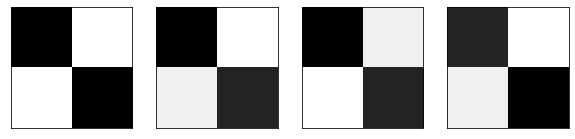

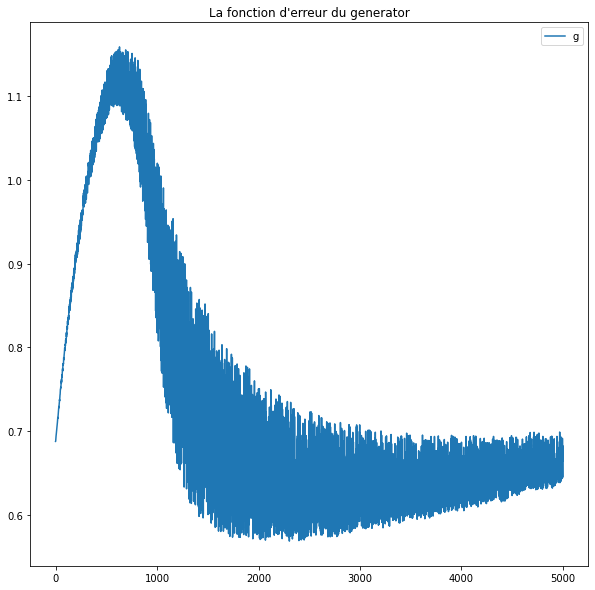

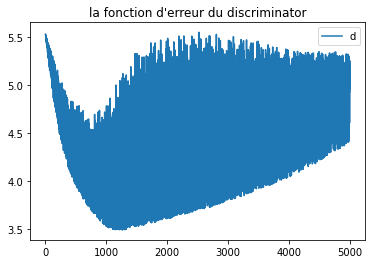

[0.90411679 0.07220377 0.03372723 0.81810813]
[0.95441488 0.04115529 0.015645   0.91873081]
[0.9420814  0.04926392 0.01997981 0.89411978]
[0.94961848 0.04436231 0.01732374 0.9091926 ]
Generator poids [ 1.47418791 -1.09970804 -1.45386777  1.70326492]
Generator biases [ 1.99984987 -2.37131837 -3.11452599  1.22169218]
Discriminator poids [ 0.17988601 -0.22208076 -1.23598827  0.29750266]
Discriminator bias -0.342802287332226


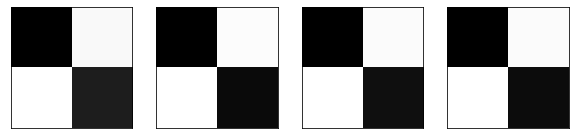

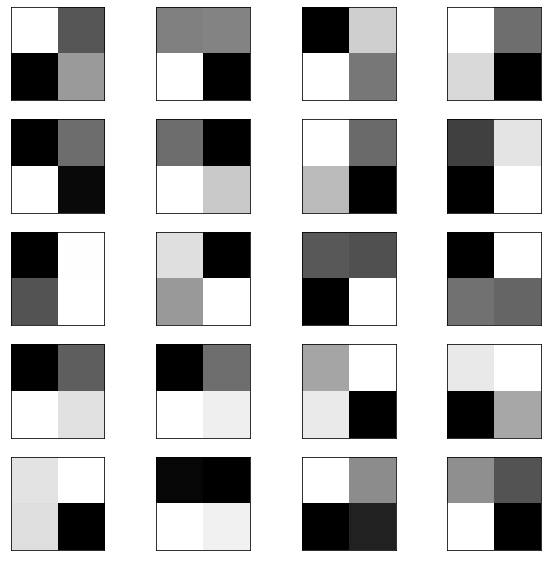

In [5]:
import numpy as np
from numpy import random
from matplotlib import pyplot as plt


def afficher(ech, m, n):
    fig, axes = plt.subplots(figsize=(10, 10), nrows=m, ncols=n, sharey=True, sharex=True)
    for ax, img in zip(axes.flatten(), ech):
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
        im = ax.imshow(1-img.reshape((2,2)), cmap='Greys_r')  
    return fig, axes, im,


def generate_random_image():
    return [np.random.random(), np.random.random(), np.random.random(), np.random.random()]



def sigmoid(x):
    return np.exp(x)/(1.0+np.exp(x))

class Discriminator():
    def __init__(self):
        self.poids = np.array([0.0 for i in range(4)])
        self.bias = 0.0
        #self.poids = np.array([np.random.normal() for i in range(4)])
        #self.bias = np.random.normal()
    
    def avance(self, x):
        # 
        return sigmoid(np.dot(x, self.poids) + self.bias)
    
    def erreur_image(self, image):
        prediction = self.avance(image)
        # on veut que la prédiction soit 1 , donc la fonction erreur est -log(prediction)
        return -np.log(prediction)
    
    def derriver_image(self, image):
        prediction = self.avance(image)
        derivatives_poids = -image * (1-prediction)
        derivative_bias = -(1-prediction)
        return derivatives_poids, derivative_bias
    
    def changer_depuis_image(self, x):
        ders = self.derriver_image(x)
        self.poids -= vittesse_apprentisage * ders[0]
        self.bias -= vittesse_apprentisage * ders[1]

    def erreur_de_bruit(self, bruit):
        prediction = self.avance(bruit)
        # on veut que la prédiction soit 0 , donc la fonction erreur est -log(1-prediction)
        return -np.log(1-prediction)
    
    def derriver_bruit(self, bruit):
        prediction = self.avance(bruit)
        derivatives_poids = bruit * prediction
        derivative_bias = prediction
        return derivatives_poids, derivative_bias
    
    def changer_depuis_bruit(self, bruit):
        ders = self.derriver_bruit(bruit)
        self.poids -= vittesse_apprentisage * ders[0]
        self.bias -= vittesse_apprentisage * ders[1]

class Generator():
    def __init__(self):
        self.poids = np.array([np.random.normal() for i in range(4)])
        self.biases = np.array([np.random.normal() for i in range(4)])

    def avance(self, z):
        # avance pass
        return sigmoid(z * self.poids + self.biases)

    def erreur(self, z, discriminator):
        x = self.avance(z)
        #
        y = discriminator.avance(x)
        return -np.log(y)

    def derivatives(self, z, discriminator):
        discriminator_poids = discriminator.poids
        discriminator_bias = discriminator.bias
        x = self.avance(z)
        y = discriminator.avance(x)
        factor = -(1-y) * discriminator_poids * x *(1-x)
        derivatives_poids = factor * z
        derivative_bias = factor
        return derivatives_poids, derivative_bias

    def update(self, z, discriminator):
        erreur_avant = self.erreur(z, discriminator)
        ders = self.derivatives(z, discriminator)
        self.poids -= vittesse_apprentisage * ders[0]
        self.biases -= vittesse_apprentisage * ders[1]
        erreur_after = self.erreur(z, discriminator)
        
        
        
# Examples de pattern "visages"
visages = [np.array([1,0,0,1]),
         np.array([0.9,0.1,0.2,0.8]),
         np.array([0.9,0.2,0.1,0.8]),
         np.array([0.8,0.1,0.2,0.9]),
         np.array([0.8,0.2,0.1,0.9])]
    
_ = afficher(visages, 1, 4)
# Examples d'images bruitées 
bruit = [np.random.randn(2,2) for i in range(20)]
bruitinit=bruit
afficher(bruitinit, 5,4)


# on met un seed
np.random.seed(42)

# le vittesse et les epochs (hyperparametres)
vittesse_apprentisage = 0.01
epochs = 1000

# Le GAN
D = Discriminator()
G = Generator()

# Pour visualiser les erreurs
erreurs_discriminator = []
erreurs_generator = []

for epoch in range(epochs):
    
    for visage in visages:
        
        # on fait un update des poids du discriminateur à partir du vrai 'visage'
        D.changer_depuis_image(visage)
    
        # On prends n'importe quel num pour generer un faux visage
        z = random.rand()

        # on calcul l'erreur du discriminateur
        erreurs_discriminator.append(sum(D.erreur_image(visage) + D.erreur_de_bruit(z)))
        
        # on calcul l'erreur du generateur
        erreurs_generator.append(G.erreur(z, D))
        
        # on construit un faux visage
        bruit = G.avance(z)
        
        # on fait un update des  poids du discriminator visage fake
        D.changer_depuis_bruit(bruit)
    
        # on fait un update des poids du generator a partir du visage fake 
        G.update(z, D)

plt.subplot(1,1,1)
plt.plot(erreurs_generator)
plt.title("La fonction d'erreur du generator")
plt.legend("gen")
plt.show()
plt.subplot(1,1,1)
plt.plot(erreurs_discriminator)
plt.legend('disc')
plt.title("la fonction d'erreur du discriminator")
plt.show()

images_generes = []
for i in range(4):
    z = random.random()
    images_genere = G.avance(z)
    images_generes.append(images_genere)
_ = afficher(images_generes, 1, 4)
for i in images_generes:
    print(i)
afficher(bruitinit, 5,4)

print("Generator poids", G.poids)
print("Generator biases", G.biases)

print("Discriminator poids", D.poids)
print("Discriminator bias", D.bias)